In [116]:
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import cohen_kappa_score

In [91]:
subject_ids_nsrr       = pd.read_csv('../wearsed/dataset/data_ids/mesa_ids_nsrr.csv', header=None)[0].values
subject_ids_somnolyzer = pd.read_csv('../wearsed/dataset/data_ids/mesa_ids_somnolyzer.csv', header=None)[0].values

In [108]:
both_ids = []
for subject_id in subject_ids_somnolyzer:
    if subject_id in subject_ids_nsrr:
        both_ids.append(subject_id)

In [119]:
hypnogram_values_nsrr = []
hypnogram_values_somnolyzer = []
for subject_id in tqdm(both_ids):
    hypnogram_nsrr = pd.read_csv(f'/vol/sleepstudy/datasets/mesa/scorings/nsrr/hypnogram/hypnogram-{subject_id:04}.csv', header=None)[0]
    hypnogram_somnolyzer = pd.read_csv(f'/vol/sleepstudy/datasets/mesa/scorings/somnolyzer/hypnogram/hypnogram-{subject_id:04}.csv', header=None)[0]
    both_hypnogram = pd.DataFrame({ 'nsrr': hypnogram_nsrr, 'somnolyzer': hypnogram_somnolyzer })
    both_hypnogram.fillna(0, inplace=True)
    hypnogram_values_nsrr += list(both_hypnogram['nsrr'][::30])
    hypnogram_values_somnolyzer += list(both_hypnogram['somnolyzer'][::30])
print(len(hypnogram_values_nsrr))

100%|██████████| 1887/1887 [00:11<00:00, 161.03it/s]

2341681


<Axes: >

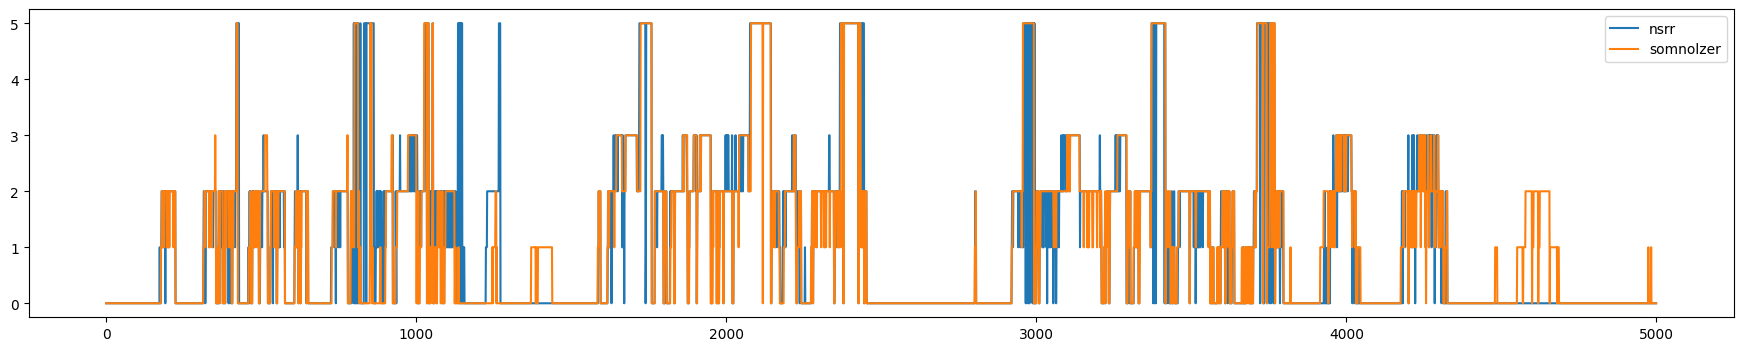

In [126]:
pd.DataFrame({ 'nsrr': hypnogram_values_nsrr, 'somnolzer': hypnogram_values_somnolyzer }).iloc[:5000].plot(figsize=(22, 4))

In [127]:
cohen_kappa_score(hypnogram_values_nsrr, hypnogram_values_somnolyzer)

np.float64(0.7254979735040703)